<a href="https://colab.research.google.com/github/mdaugherity/PatternRecognition2020/blob/master/Class%20Work/Class_3_06_DIY_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DIY Support Vector Machine 
Study how the SVM works with some examples

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from scipy import optimize 

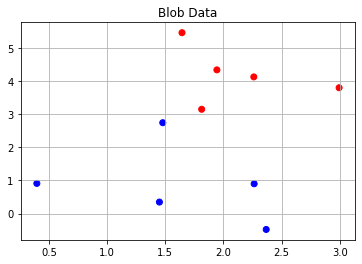

In [ ]:
X,y = datasets.make_blobs(n_samples=10, centers = [[0.5, 0.5],[1.5,4]], shuffle=0, random_state=0)

plt.figure()
plt.scatter(X[:,0], X[:,1],c=y, cmap=plt.cm.bwr)
plt.grid()
plt.title('Blob Data')
plt.show()

Find the optimal line that divides red from blue.  The algorithm is as follows:
1.  Initialize (non-zero) vector W
1.  Find b so that the decision boundary $w\cdot x = b$ is exactly in between support vectors
1.  Adjust W to lower the margin
1.  Goto 2



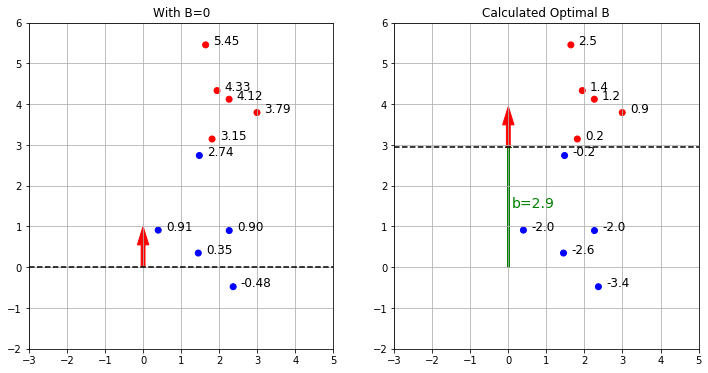

Margin =  0.2025055307484087


In [ ]:
w = np.array([0,2])  # weight vector
wmag = np.linalg.norm(w)  # GOING TO NORMALIZE W SO MARGIN DOESN'T SHIFT
wn = w / wmag

score = np.sum(wn*X,axis=1) # Score Points

# Find margin and b
mp = score[y==1].min()   # pos margin
mn = score[y==0].max()  # neg margin
b = (mp+mn)/2   # score of decision boundary  
margin = (mp-mn)/2 # distance from support vectors to boundary
dist = b # actual graph distance to boundary

x_min = -3
x_max = 5
x = np.linspace(x_min, x_max)

wx = wn[0]
wy = wn[1]

plt.figure(figsize=(12,6))
# ------------PLOT WITH b = 0---------------- 
plt.subplot(1,2,1)
plt.plot(x, -wx*x/wy,'--k')   # Line perp to w
plt.arrow(0, 0, wx, wy, color='r',length_includes_head=1, width=0.1 )
plt.scatter(X[:,0], X[:,1],c=y, cmap=plt.cm.bwr)
for i,s in enumerate(score):
    plt.text(X[i,0]+0.2, X[i,1], f'{s:0.2f}',fontsize=12)
plt.grid()
plt.title('With B=0')
plt.xlim((x_min, x_max))
plt.ylim((-2, 6))

# ------------PLOT WITH REAL b---------------- 
plt.subplot(1,2,2)
dec_bound = (-wx*x+b)/wy  # decision boundary line
plt.plot(x, dec_bound,'--k')
ang = np.arctan2(wy,wx)
dx = dist*np.cos(ang)
dy = dist*np.sin(ang)
plt.arrow(0, 0, dx, dy, color='g',width=0.05,head_length=0)
plt.arrow(dx, dy, wx, wy, color='r',length_includes_head=1, width=0.1 )
plt.text(dx/2+0.1, dy/2, f'b={b:0.1f}',fontsize=14, color='g')
plt.scatter(X[:,0], X[:,1],c=y, cmap=plt.cm.bwr)
score -= b
for i,s in enumerate(score):
    plt.text(X[i,0]+0.2, X[i,1], f'{s:0.1f}',fontsize=12)
plt.xlim((x_min, x_max))
plt.ylim((-2, 6))
plt.grid()
plt.title('Calculated Optimal B')

plt.show()
print('Margin = ',margin)

**LEFT** The score is the distance between each point and the line perp. to W.  Here we have $b=0$ so the line goes through the origin. 

**RIGHT** We set b so that the decision boundary $w\cdot x = b$ exactly splits between the support vectors (aka points nearest to the line)

In [ ]:
# Define a function to make the above plot 
def make_margin_plot(w):
    # Find margin and b
    wmag = np.linalg.norm(w) 
    wn = w / wmag
    score = np.sum(wn*X,axis=1) # Score Points
    mp = score[y==1].min()   # pos margin
    mn = score[y==0].max()  # neg margin
    margin = (mp-mn)/2
    b = (mp+mn)/2   # score of decision boundary  
    wx = wn[0]
    wy = wn[1]
    
    x_min = -3
    x_max = 5
    x = np.linspace(x_min, x_max)
    dec_bound = (-wx*x+b)/wy  # decision boundary line
    plt.plot(x, dec_bound,'--k')
    ang = np.arctan2(wy,wx)
    dx = b*np.cos(ang)
    dy = b*np.sin(ang)
    plt.arrow(0, 0, dx, dy, color='g',width=0.05,head_length=0)
    plt.arrow(dx, dy, wx, wy, color='m',length_includes_head=1, width=0.1 )
    plt.text(dx/2+0.1, dy/2, f'b={b:0.1f}',fontsize=14, color='g')
    plt.scatter(X[:,0], X[:,1],c=y, cmap=plt.cm.bwr)
    score = np.sum(wn*X,axis=1)-b 
    for i,s in enumerate(score):
        plt.text(X[i,0]+0.2, X[i,1], f'{s:0.1f}',fontsize=12)
    #plt.xlim((x_min, x_max))
    #plt.ylim((-2, 6))
    plt.grid()
    plt.title(f'Margin = {margin:0.2f}')

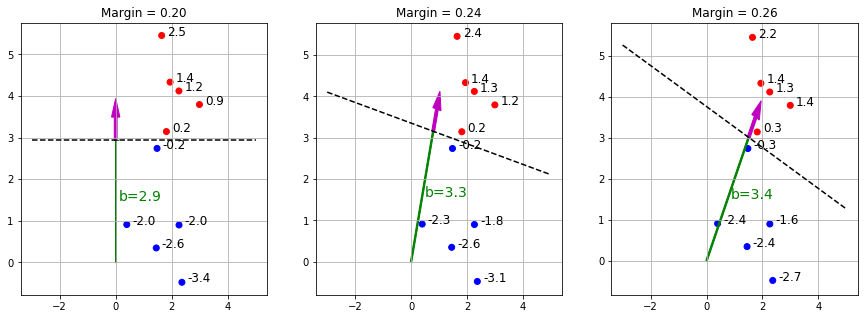

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
make_margin_plot(np.array([0,1]))

plt.subplot(1,3,2)
make_margin_plot(np.array([0.25,1]))

plt.subplot(1,3,3)
make_margin_plot(np.array([0.5,1]))

plt.show()

As we rotate w we change the angle of the decision boundary which increases the margin.

Let's use the built-in `minimize` routines to actually find the best one.  Since there isn't a maximizer, we have to minimize the negative of margin

In [ ]:
# returns -margin
def find_margin(w):
    wmag = np.linalg.norm(w) 
    wn = w / wmag
    score = np.sum(wn*X,axis=1) # Score Points
    mp = score[y==1].min()   # pos margin
    mn = score[y==0].max()  # neg margin
    margin = (mp-mn)/2
    return -margin

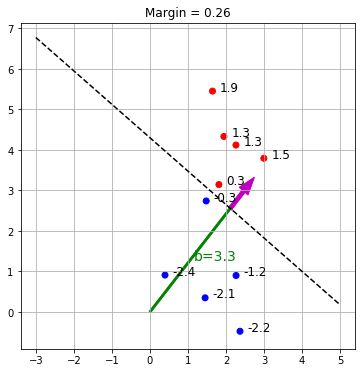

Optimal W= [0.73417031 0.88938459]
Max Margin= 0.2625882327753526


In [ ]:
res = optimize.minimize(find_margin, x0=[0,1])
plt.figure(figsize=(6,6))
make_margin_plot(res.x)
plt.show()
print('Optimal W=',res.x)
print('Max Margin=',-res.fun)